# Classification insuffisance cardiaque

# Sommaire

## I. Importation des données
#### A. Importation des bibliothèques
#### B. Importation du fichier

### II. Exploration du fichier

## III. Modélisation
### A. Entrainement et sélection des modèles
#### 1. Régression Logistiques
#### 2. Naive Bayes
#### 3. Random Forest
#### 4. SVM

## B. Optimisation
#### 1. Régression Logistique
#### 2. Random Forest

## Conclusion

# 

### I. Importation des données

#### A. Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Encodage
from sklearn import preprocessing

# Séparation du jeu de données
from sklearn.model_selection import train_test_split

# Modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Mesures de performances
from sklearn.metrics import *
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV


# Divers
import warnings
warnings.filterwarnings('ignore')

#### B. Importation du fichier

In [2]:
data = pd.read_csv('heart.csv')

# 

### II. Exploration du fichier

In [3]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:title={'center':'Analyse du type des colonnes'}, ylabel='None'>

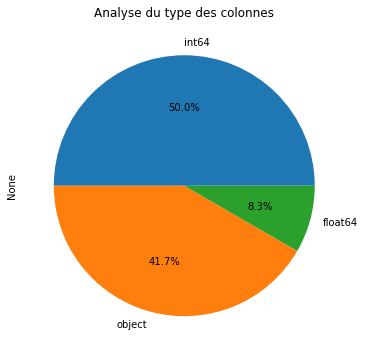

In [5]:
# Représentation de la nature des colonnes

# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

plt.figure(figsize = (6,6))
data.dtypes.value_counts().plot(kind = 'pie',
                               autopct="%1.1f%%", title = "Analyse du type des colonnes")

Text(0.5, 1.0, "Représentation de l'âge des patients")

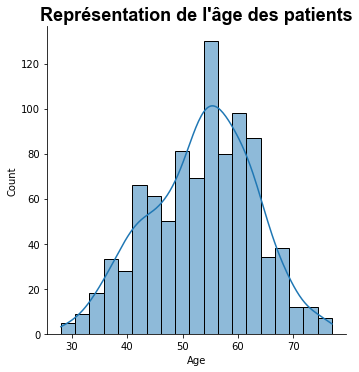

In [6]:
# Analyse colonne Age

data['Age'].nunique()

sns.displot(x = data['Age'], data = data,
           kde = True)
plt.title("Représentation de l'âge des patients",
         fontdict = title)

La majorité des patients sont entre 40 et 60 ans avec une forte présence des patients ayant environ 50 ans.

Text(0.5, 1.0, 'Représentation du sexe des patients')

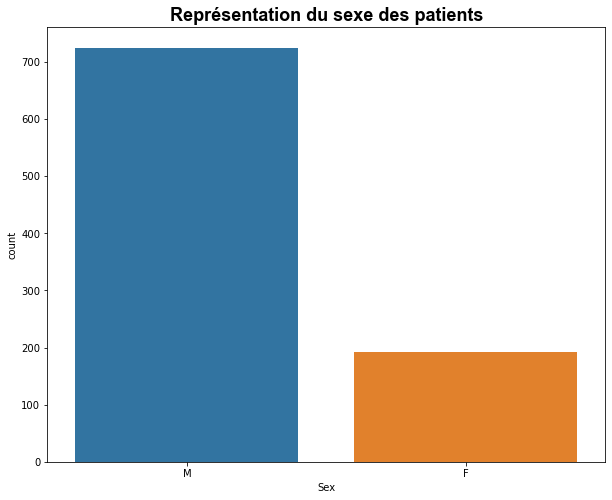

In [7]:
# Analyse colonne sexe

plt.figure(figsize = (10,8))
sns.countplot(x = data['Sex'], data = data)
plt.title('Représentation du sexe des patients',
         fontdict = title)

Nous pouvons constater une très forte présente du sexe masculin dans l'analyse.

Text(0.5, 1.0, "Représentation de l'âge des patients selon le sexe")

<Figure size 720x576 with 0 Axes>

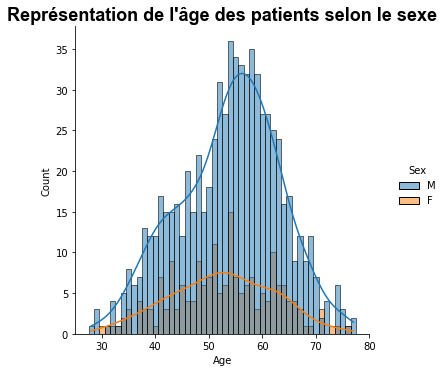

In [8]:

plt.figure(figsize = (10,8))
sns.displot(x = data['Age'], data = data, hue = data['Sex'],
           kde = True, discrete = True)
plt.title("Représentation de l'âge des patients selon le sexe",
         fontdict = title)

In [9]:
# Analyse colonne ChestPainType

data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

Text(0.5, 1.0, 'Représentation des douleurs en fonction du sexe')

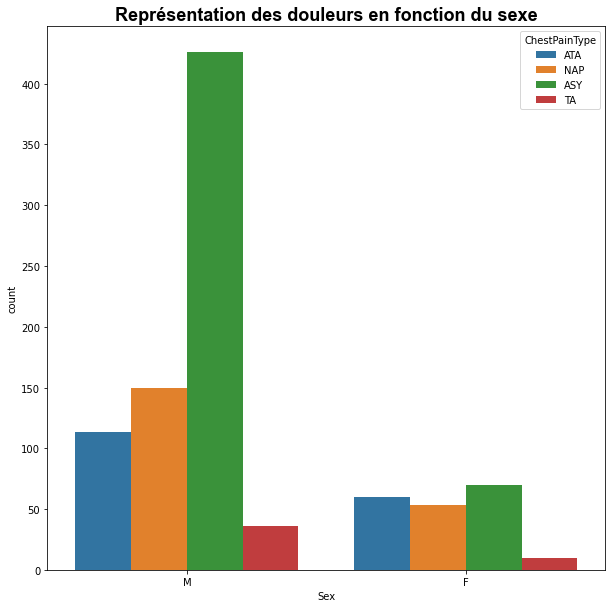

In [10]:
plt.figure(figsize = (10,10))

sns.countplot(x = data['Sex'], data = data, hue = data['ChestPainType'])
plt.title("Représentation des douleurs en fonction du sexe",
         fontdict = title)

Nous pouvons constater que la majorité des patients ne présentent pas d'angines ou sans douleurs spécifiques.
Une faible partie des patients (environ 210 patients) ont présenté une angine de poitrine typique ou atypiques.

In [11]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
data['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

Text(0.5, 1.0, 'Représentation du niveau de cholestérol')

<Figure size 720x576 with 0 Axes>

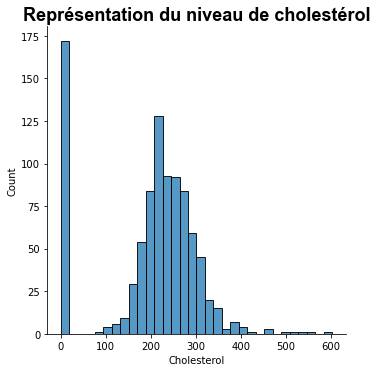

In [13]:
# Analyse Cholesterol

data['Cholesterol'].value_counts()

plt.figure(figsize = (10,8))
sns.displot(x = data['Cholesterol'], data = data)
plt.title("Représentation du niveau de cholestérol",
         fontdict = title)

Text(0.5, 1.0, 'Représentation de la fréquence cardiaque des patients')

<Figure size 720x576 with 0 Axes>

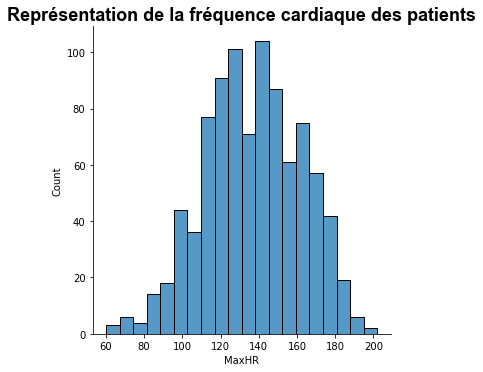

In [14]:
# Analyse MaxHR

data['MaxHR'].value_counts()

plt.figure(figsize = (10,8))
sns.displot(x = data['MaxHR'], data = data)
plt.title("Représentation de la fréquence cardiaque des patients",
         fontdict = title)

In [15]:
# Analyse target

data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'Représentation des risques selon le sexe des patients')

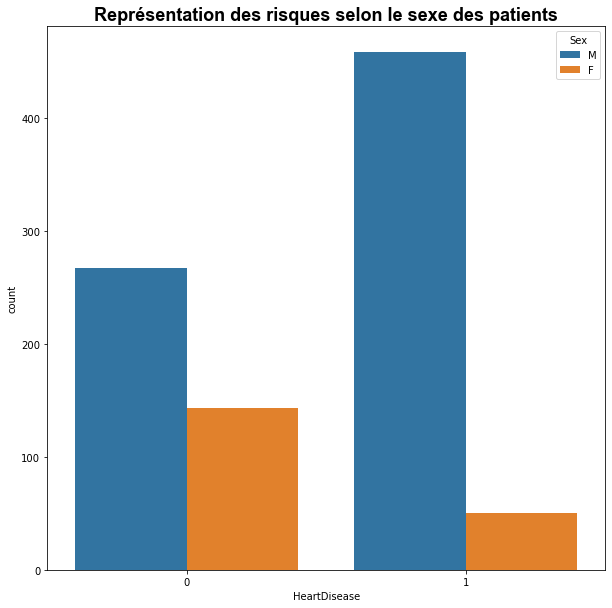

In [16]:
# Analyse target selon le sexe des patients

plt.figure(figsize = (10,10))

sns.countplot(x = data['HeartDisease'], data = data, hue = data['Sex'])
plt.title("Représentation des risques selon le sexe des patients",
         fontdict = title)

Dans le cadre de notre analyse des données.

Nous pouvons déjà constaté une plus forte présence des patients masculin que féminin. L'âge le plus représenté oscille entre 40 et 70 ans.
Sur les différentes analyses que nous avons effectué, nous avons remarqué qu'une grande partie des patients ne semblent pas avoir eu de soucis d'angine hormis une partie des patients avec des problèmes plus importants.

Il semble que le cholestérol impacte cette notion d'angine de poitrine et par conséquent un risque d'insuffisance cardiaque.

Notre objectif ici est de déterminer le rôle de nos variables dans notre problématique.

Donéravant, nous allons travailler sur la modélisation de notre problématique.

Le but sera de déterminer si notre modèle a la capacité de prédire un risque d'insuffisance à travers les informations obtenues.

### III. Modélisation

Nous sommes ici sur une problématique de classification. Nous allons utiliser des modèles liés à cette problématique.

Nous allons tester les modèles suivants :
- Régression Logistique,
- Naive Bayes,
- Arbre de décision,
- SVM

Pour effectuer notre modélisation, nous allons procéder à la méthodologie suivante :
- LabelEncoder pour les colonnes objets,
- Séparation de notre jeu de données en Train/test,
- Entrainement de nos modèles,
- Analyse du modèle le plus performant.
- Sélection du meilleur modèle et optimisation de ce dernier.

### A. Entrainement et sélection des modèles

In [17]:
# 1. Label Encoder


label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [18]:
# Création de notre jeu de données

X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = data['HeartDisease']

In [19]:
# Séparation du jeu de données

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print ('Données apprentissage', X_train.shape)
print ('Données de test', X_test.shape)

Données apprentissage (688, 11)
Données de test (230, 11)


##### 1. Régression Logistique

In [20]:
# Création du modèle
model1 = LogisticRegression()

# Entrainement du modèle
model1.fit(X_train, y_train)

# Prédiction
prediction = model1.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A1 = model1.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A1)


R1 = model1.score(X_test, y_test)
print("Le score de test est de : ",R1)


Le score d'apprentissage est de :  0.8531976744186046
Le score de test est de :  0.8565217391304348


In [21]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model1.predict(X_test))

array([[ 81,  16],
       [ 17, 116]], dtype=int64)

In [22]:
# MAE

MAE1 = mean_absolute_error(y_test, prediction)
      
# MSE

MSE1 = np.sqrt(mean_squared_error(y_test, prediction))

#### 2. Naive Bayes

In [23]:
# Création du modèle
model2 = GaussianNB()

# Entrainement du modèle
model2.fit(X_train, y_train)

# Prédiction
prediction = model2.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A2 = model2.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A2)


R2 = model2.score(X_test, y_test)
print("Le score de test est de : ",R2)

Le score d'apprentissage est de :  0.8575581395348837
Le score de test est de :  0.8478260869565217


In [24]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model2.predict(X_test))

array([[ 84,  13],
       [ 22, 111]], dtype=int64)

In [25]:
# MAE

MAE2 = mean_absolute_error(y_test, prediction)
      
# MSE

MSE2 = np.sqrt(mean_squared_error(y_test, prediction))

#### 3. Random Forest

In [26]:
# Création du modèle
model3 = RandomForestClassifier()

# Entrainement du modèle
model3.fit(X_train, y_train)

# Analyse de nos prédictions
prediction3 = model3.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A3 = model3.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A3)


R3 = model3.score(X_test, y_test)
print("Le score de test est de : ",R3)

Le score d'apprentissage est de :  1.0
Le score de test est de :  0.8826086956521739


In [27]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model3.predict(X_test))

array([[ 82,  15],
       [ 12, 121]], dtype=int64)

In [28]:
# MAE (Mean Absolute Error)

MAE3 = mean_absolute_error(y_test, prediction3)
      
# MSE (Mean Squarred Error)

MSE3 = mean_squared_error(y_test, prediction3)

#### 4. Sector Vector Machine

In [29]:
from sklearn import svm

# Création du modèle
model4 = svm.SVC()

# Entrainement du modèle
model4.fit(X_train, y_train)

# Analyse de nos prédictions
prediction4 = model4.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A4 = model3.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A4)


R4 = model4.score(X_test, y_test)
print("Le score de test est de : ",R4)

Le score d'apprentissage est de :  1.0
Le score de test est de :  0.7086956521739131


In [30]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model4.predict(X_test))

array([[67, 30],
       [37, 96]], dtype=int64)

In [31]:
# MAE (Mean Absolute Error)

MAE4 = mean_absolute_error(y_test, prediction4)
      
# MSE (Mean Squarred Error)

MSE4 = mean_squared_error(y_test, prediction4)

### Analyse de nos résultats

In [32]:
A = [A1, A2, A3, A4]
R = [R1, R2, R3, R4]
MAE = [MAE1, MAE2, MAE3, MAE4]
MSE = [MSE1, MSE2, MSE3, MSE4]

indice = ['Régression logistique','NaiveBayes', 'Random Forest', 'SVM']


data_analyse = pd.DataFrame ({'Score Apprentissage': A,'Score Test' : R, 'MAE':MAE, 'MSE':MSE}, index = indice)
data_analyse

,Score Apprentissage,Score Test,MAE,MSE
Régression logistique,0.853198,0.856522,0.143478,0.378785
NaiveBayes,0.857558,0.847826,0.152174,0.390095
Random Forest,1.000000,0.882609,0.117391,0.117391
SVM,1.000000,0.708696,0.291304,0.291304


Nous pouvons constater que parmi les 4 modèles que nous avons choisi, la Régression Logistique mais également le Random Forest présentent les meilleurs résultats.

Nous allons prendre la décision d'optimiser ces deux modèles afin de déterminer le modèle optimal pour notre projet.
Le Naive Bayes présente également de très bons résultats mais nous allons rester sur une optimisation de ces deux modèles.

### B. Optimisation

### 1. Régression logistique

##### A. Cross Validation

In [33]:
cross_val_score(LogisticRegression(), X_train, y_train, cv = 10).mean()

0.8487851662404091

In [34]:
C = [1,10,100,1000, 10000, 100000]
score_apprentissage, score_validation = validation_curve(model1, X_train, y_train,
                                                        param_name = 'C',
                                                        param_range = C, cv = 10)

In [35]:
score_validation.mean(axis = 1)

array([0.84878517, 0.84878517, 0.84733589, 0.84878517, 0.85023444,
       0.84878517])

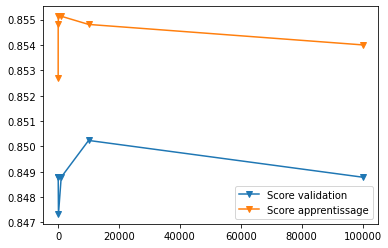

In [36]:
plt.plot(C, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(C, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

#### 2. GridSearch CV

In [37]:
grid_param = {'C' : [14000,14500, 15000, 15500, 16000, 17000,],
             'random_state' : [100, 1000, 2000, 10000]}
              
grid_search_rl = GridSearchCV(LogisticRegression(), grid_param, cv = 5)

In [38]:
# ici, on entraine la fonction
grid_search_rl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [14000, 14500, 15000, 15500, 16000, 17000],
                         'random_state': [100, 1000, 2000, 10000]})

In [39]:
# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_rl.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_rl.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.8502062837194542
Les meilleurs hyperparamètres sont :  {'C': 14000, 'random_state': 100}


Dans le cadre de notre optimisation, nous pouvons constater une très légère baisse de nos résultats. Nous avons stabilité notre score à 0.85, ce qui reste un excellent résultat.

A présent, nous allons procéder à une méthodologie identique à notre Random Forest et ainsi déterminer le meilleur modèle.

### 2. Random Forest

#### A. Cross Validation

In [40]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10).mean()

0.8575873827791988

In [41]:
n_estimators = [100, 300, 500, 700, 1000, 1500, 2000, 5000, 10000]
score_apprentissage, score_validation = validation_curve(model3, X_train, y_train,
                                                        param_name = 'n_estimators',
                                                        param_range = n_estimators, cv = 10)

In [42]:
score_validation.mean(axis = 1)

array([0.86050725, 0.86048593, 0.86048593, 0.8634058 , 0.86483376,
       0.86481245, 0.8619139 , 0.86483376, 0.86485507])

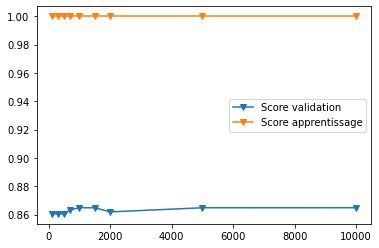

In [43]:
plt.plot(n_estimators, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(n_estimators, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

In [44]:
max_depth = [1, 50, 100]
score_apprentissage, score_validation = validation_curve(model3, X_train, y_train,
                                                        param_name = 'max_depth',
                                                        param_range = max_depth, cv = 10)

In [45]:
score_validation.mean(axis = 1)

array([0.83723359, 0.86479113, 0.85899403])

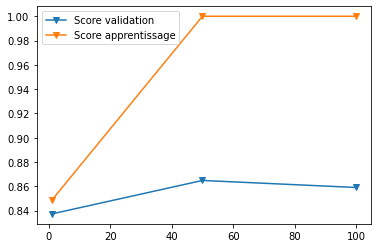

In [46]:
plt.plot(max_depth, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(max_depth, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

#### B. GridSearchCV

In [47]:
grid_param = {'n_estimators' : [4600,4800,5000, 5200],
              'max_depth' : [48, 49, 50, 51, 52]}
              
grid_search_rf = GridSearchCV(RandomForestClassifier(), grid_param, cv = 5)

In [48]:
# ici, on entraine la fonction
grid_search_rf.fit(X_train, y_train)

# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_rf.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_rf.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.8706230826192742
Les meilleurs hyperparamètres sont :  {'max_depth': 49, 'n_estimators': 4600}


In [50]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model3.predict(X_test))

array([[ 82,  15],
       [ 12, 121]], dtype=int64)

## Prédiction de données

Nous allons créer une méthode nous permettant, à travers l'analyse de nos données et sur notre modélisation de tester si notre modèle basé sur le Random Forest peut prédire le risque d'insuffisance cardiaque pour un patient.

In [55]:
# Création du modèle
model = RandomForestClassifier(max_depth = 49, n_estimators = 4600)

# Entrainement du modèle
model.fit(X_train, y_train)

# Analyse de nos prédictions
prediction = model.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A = model.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A)


R = model3.score(X_test, y_test)
print("Le score de test est de : ",R)

Le score d'apprentissage est de :  1.0
Le score de test est de :  0.8826086956521739


In [56]:
# Création de notre modèle afin de tester nos données

def heart(model, Age = 31, Sex = 1, ChestPainType = 0, RestingBP = 120, Cholesterol = 0, FastingBS = 0,
       RestingECG = 0, MaxHR = 170, ExerciseAngina = 1, Oldpeak = 1, ST_Slope = 0):
    
    x = np.array ([ Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS,
       RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]).reshape(1, 11)
    
    print(model.predict(x))
    print(model.predict_proba(x))


In [57]:
heart(model)

[1]
[[0.25956522 0.74043478]]


Ici, nous avons un résultat indiquant une insuffisance cardiaque. Nous allons analyser la probabilité de ce résultat.

Ce dernier nous indique un score 0 à 25,95% et un score de 1 à 74,04%.


# IV. Conclusion

En conclusion, nous pouvons indiquer que notre problématique de pouvoir prédire un risque d'insuffisance cardiaque pour un patient a parfaitement fonctionné.

Ce projet nous a amené à effectuer une première exploration des données (connaissance des variables, leur impact sur notre prédiction et la modélisation).

Après avoir abordé cette première phase, nous avons procédé à une modélisation à travers une sélection de 4 algorithmes liés à cette problématique.
Nous avons, par la suite, procéder à une sélection des 2 modèles ayant obtenu à la fois le meilleur score mais également le niveau d'erreur le plus faible.

Ensuite, nous avons procédé à une optimisation de nos modèles à travers une amélioration des paramètres de nos différents modèles. Cette optimisation a permis une amélioration du Random Forest qui sera notre modèle sélectionné.

Enfin, nous avons terminé par un test sur notre modèle dans le but de prédire un résultat à travers des données.

Nous pouvons ainsi confirmer que notre modèle correspond à un excellent score mais qu'il est toutefois possible d'améliorer ce dernier à travers une optimisation d'autres paramètres.